In [3]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [4]:
def extract_curt_CM_one_tech(cm,nbc): 
    ts_CM_All_lines = pd.read_csv(f"Y.FYTS_from_ByStages/RTS24_mod1/{cm}/NetworkUtilization_nc{nbc}.csv",header = [0,1],index_col=0)
    ts_this_line_CM = ts_CM_All_lines.loc[:,node_pair].to_numpy()
    return ts_this_line_CM

<Axes: title={'center': 'Row Sum'}, xlabel='Hour'>

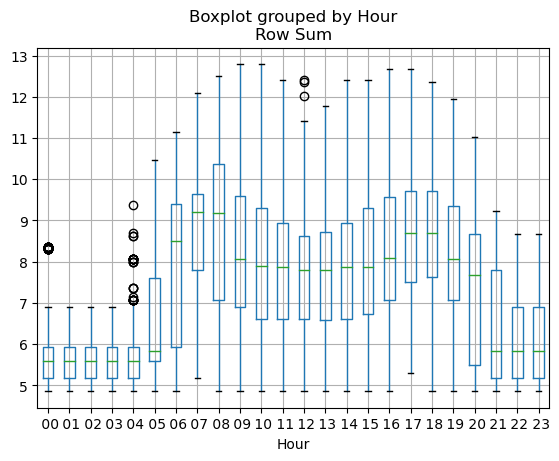

In [65]:
cm = "CHI"
nbc= 200
df_curt = pd.read_csv(f"Y.FYTS_from_ByStages/RTS24_mod1/{cm}/NetworkUtilization_nc{nbc}.csv",header = [0,1],index_col=0)
df_curt['Row Sum'] = df_curt.sum(axis=1)
df_curt['Hour'] = [index[5:8] for index in df_curt.index]
df_curt.boxplot(column="Row Sum",by = "Hour")

A.The_full_year_MILP


<Axes: xlabel='Number of clusters', ylabel='Total_curt_w'>

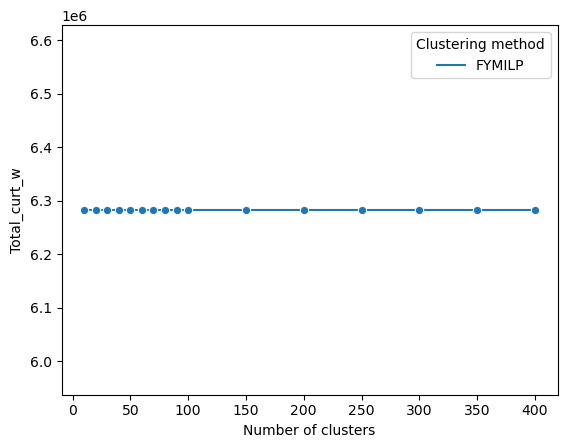

In [33]:
all_curts

,Period,Scenario,LoadLevel,Unit,MW,CaseName,Clustering method,Number of clusters,Weight
0,2030,sc01,1900-01-01 00:00:00+01:00,103_PV_1,0.000000,A.The_full_year_MILP - RTS24_mod110,FYMILP,10,1
1,2030,sc01,1900-01-01 00:00:00+01:00,104_PV_1,0.000000,A.The_full_year_MILP - RTS24_mod110,FYMILP,10,1
2,2030,sc01,1900-01-01 00:00:00+01:00,118_RTPV_10,0.000000,A.The_full_year_MILP - RTS24_mod110,FYMILP,10,1
3,2030,sc01,1900-01-01 00:00:00+01:00,118_RTPV_6,0.000000,A.The_full_year_MILP - RTS24_mod110,FYMILP,10,1
4,2030,sc01,1900-01-01 00:00:00+01:00,118_RTPV_5,0.000000,A.The_full_year_MILP - RTS24_mod110,FYMILP,10,1
...,...,...,...,...,...,...,...,...,...
183451,2030,sc01,1900-12-30 23:00:00+01:00,118_RTPV_9,0.000000,A.The_full_year_MILP - RTS24_mod1400,FYMILP,400,1
183452,2030,sc01,1900-12-30 23:00:00+01:00,118_RTPV_1,0.000000,A.The_full_year_MILP - RTS24_mod1400,FYMILP,400,1
183453,2030,sc01,1900-12-30 23:00:00+01:00,118_RTPV_7,0.000000,A.The_full_year_MILP - RTS24_mod1400,FYMILP,400,1
183454,2030,sc01,1900-12-30 23:00:00+01:00,101_PV_1,0.537344,A.The_full_year_MILP - RTS24_mod1400,FYMILP,400,1


In [34]:
# Convert the LoadLevel column to datetime
all_curts['LoadLevel'] = pd.to_datetime(all_curts['LoadLevel'], format='%m-%d %H:%M:%S%z')

# Extract the hour and create a new column
all_curts['Hour'] = all_curts['LoadLevel'].dt.hour


ValueError: Tz-aware datetime.datetime cannot be converted to datetime64 unless utc=True, at position 2139. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

In [25]:
import pandas as pd

# Sample DataFrame to simulate the issue
data = {
    "Period": [2030, 2030, 2030, 2030, 2030, 2030],
    "Scenario": ["sc01"] * 6,
    "LoadLevel": [
        "01-01 00:00:00+01:00",
        "01-01 01:00:00+01:00",
        "01-01 02:00:00+01:00",
        "12-30 22:00:00+01:00",
        "12-30 23:00:00+01:00",
        "12-30 23:00:00+01:00",
    ],
    "Unit": ["103_PV_1", "104_PV_1", "118_RTPV_10", "118_RTPV_6", "118_RTPV_5", "101_PV_1"],
    "MW": [0.0, 0.0, 0.0, 0.0, 0.0, 0.537344],
    "CaseName": [
        "A.The_full_year_MILP - RTS24_mod110",
        "A.The_full_year_MILP - RTS24_mod110",
        "A.The_full_year_MILP - RTS24_mod110",
        "A.The_full_year_MILP - RTS24_mod1400",
        "A.The_full_year_MILP - RTS24_mod1400",
        "A.The_full_year_MILP - RTS24_mod1400",
    ],
    "Clustering method": ["FYMILP"] * 6,
    "Number of clusters": [10, 10, 10, 400, 400, 400],
    "Weight": [1] * 6
}

# Create DataFrame
df = pd.DataFrame(data)

# Check the initial data type of the LoadLevel column
print("Initial LoadLevel dtype:", df['LoadLevel'].dtype)

# Attempt to convert the LoadLevel column to datetime with error handling
try:
    df['LoadLevel'] = pd.to_datetime(df['LoadLevel'], format='%m-%d %H:%M:%S%z', errors='coerce')
except Exception as e:
    print(f"Error converting LoadLevel to datetime: {e}")

# Check if conversion was successful
print("LoadLevel dtype after conversion:", df['LoadLevel'].dtype)

# Identify and handle any conversion issues
if df['LoadLevel'].isnull().any():
    print("Some dates could not be parsed. Check for errors in the 'LoadLevel' format.")

# Extract the hour and create a new column
df['Hour'] = df['LoadLevel'].dt.hour

# Display the DataFrame
print(df)


Initial LoadLevel dtype: object
LoadLevel dtype after conversion: datetime64[ns, UTC+01:00]
   Period Scenario                 LoadLevel         Unit        MW   
0    2030     sc01 1900-01-01 00:00:00+01:00     103_PV_1  0.000000  \
1    2030     sc01 1900-01-01 01:00:00+01:00     104_PV_1  0.000000   
2    2030     sc01 1900-01-01 02:00:00+01:00  118_RTPV_10  0.000000   
3    2030     sc01 1900-12-30 22:00:00+01:00   118_RTPV_6  0.000000   
4    2030     sc01 1900-12-30 23:00:00+01:00   118_RTPV_5  0.000000   
5    2030     sc01 1900-12-30 23:00:00+01:00     101_PV_1  0.537344   

                               CaseName Clustering method  Number of clusters   
0   A.The_full_year_MILP - RTS24_mod110            FYMILP                  10  \
1   A.The_full_year_MILP - RTS24_mod110            FYMILP                  10   
2   A.The_full_year_MILP - RTS24_mod110            FYMILP                  10   
3  A.The_full_year_MILP - RTS24_mod1400            FYMILP                 400   
4  A.